In [1]:
import pandas as pd
import numpy  as np
import datetime as dt
import seaborn 
import matplotlib.pyplot as plt
import plotly.graph_objects as go


#Open a dataBase 
pizzaria_df = pd.read_csv(r"D:\Projetos bancos de dados\Pizzaria\Datafiniti_Pizza_Restaurants_and_the_Pizza_They_Sell_May19.csv")

#cleaning unnecessary data 
pizzaria_df = pizzaria_df.drop(['menuPageURL','postalCode','keys','dateAdded','dateUpdated','menus.dateSeen'],axis=1)
pizzaria_df = pizzaria_df[(pizzaria_df['menus.amountMax'] != 0) & (pizzaria_df['menus.amountMin'] != 0)]
display(pizzaria_df) 

,id,address,categories,primaryCategories,city,country,latitude,longitude,menus.amountMax,menus.amountMin,menus.currency,menus.description,menus.name,name,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,34.832300,-92.183800,7.98,7.98,USD,NaN,Cheese Pizza,Shotgun Dans Pizza,USD,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,33.509266,-112.073044,6.00,6.00,USD,NaN,Pizza Cookie,Sauce Pizza Wine,USD,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,39.144883,-84.432685,6.49,6.49,USD,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,USD,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,42.516669,-83.106630,5.99,5.99,USD,NaN,Small Pizza,Hungry Howies Pizza,USD,25,40,MI
4,AVwdaeTtkufWRAb55pSH,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,39.286630,-76.566984,5.49,5.49,USD,NaN,Pizza Sub,Spartan Pizzeria,USD,0,25,MD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwdKXFYByjofQCxmIyZ,1126 E Lovejoy St,Pizza Place,Accommodation & Food Services,Buffalo,US,42.889759,-78.806747,37.10,7.10,USD,NaN,Super Steak Pizza,Carbone's Pizzeria,USD,0,25,NY
9996,AVwdKXFYByjofQCxmIyZ,1126 E Lovejoy St,Pizza Place,Accommodation & Food Services,Buffalo,US,42.889759,-78.806747,10.10,10.10,USD,NaN,Large Cheese & 1 Item Pizza,Carbone's Pizzeria,USD,0,25,NY
9997,AVz6kzsQFcQ3k02bDhwQ,3641 E Main St,"Pizza Place,Restaurants",Accommodation & Food Services,Saint Charles,US,41.921300,-88.275300,8.45,8.45,USD,NaN,"Individual 6"" Pepperoni Stuffed Deep Dish Pizza",Giordano's Pizza,USD,0,25,IL
9998,AVz6kzsQFcQ3k02bDhwQ,3641 E Main St,"Pizza Place,Restaurants",Accommodation & Food Services,Saint Charles,US,41.921300,-88.275300,8.45,8.45,USD,NaN,"Individual 6"" Cheese Stuffed Deep Dish Pizza",Giordano's Pizza,USD,0,25,IL


In [2]:
#Question 1:
'''
What are the categories of resturants? 
'''
categories = pizzaria_df['primaryCategories'].value_counts().reset_index().rename(columns ={'index' :'Primary Categories','primaryCategories':'Values'},\
                                                                                  index={0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8})
display(categories)
'''
Analysis:
you can see that there are several pizzerias that have different categories, such as
they serve pizzas and function as restaurants 
'''


,Primary Categories,Values
1,Accommodation & Food Services,9869
2,Management of Companies & Enterprises,43
3,"Accommodation & Food Services,Management of Co...",23
4,"Retail,Accommodation & Food Services",11
5,Retail,9
6,"Wholesale Trade,Accommodation & Food Services",2
7,"Educational Services,Accommodation & Food Serv...",2
8,"Wholesale Trade,Accommodation & Food Services,...",1


'\nAnalysis:\nyou can see that there are several pizzerias that have different categories, such as\nthey serve pizzas and function as restaurants \n'

,city,province,restaurants by city
1,New York,NY,655
2,Brooklyn,NY,460
3,Los Angeles,CA,193
4,Buffalo,NY,176
5,Philadelphia,PA,140
6,Seattle,WA,135
6,Chicago,IL,133
8,Flushing,NY,124
8,San Francisco,CA,110
10,Bronx,NY,88


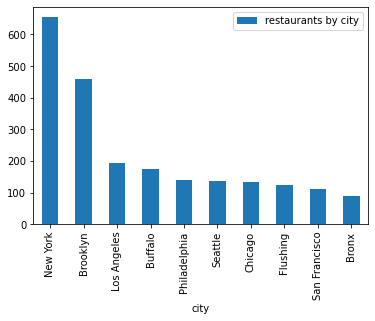

In [3]:
#Question 2:
'''
What are the 10 cities with the most pizzerias by province?  
'''
cities_for_provinces = pizzaria_df[['city','province']].value_counts().reset_index().rename(columns={0:'restaurants by city'},\
                                                                                     index={0:1,1:2,2:3,3:4,4:5,5:6,7:8,9:10})

cities_for_provinces_plot = pizzaria_df[['city']].value_counts().head(10).reset_index().rename(columns={0:'restaurants by city'},\
                                                                                               index={0:1,1:2,2:3,3:4,4:5,5:6,7:8,9:10}).plot('city','restaurants by city',kind='bar')

display(cities_for_provinces.head(10))
print('==='*40)                                                                                                                                                               


,provinces,frequency
1,NY,2638
2,CA,1379
3,PA,813
4,FL,595
5,TX,479
6,IL,381
6,MI,362
8,OH,324
8,AZ,288
10,WA,262


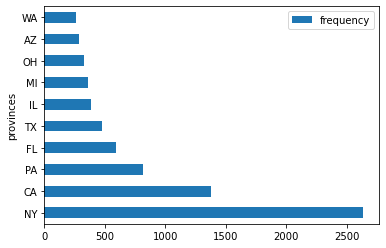

In [4]:
#Question 3:
'''
top 10 frequented provinces 
'''
provinces = pizzaria_df['province'].value_counts().reset_index().rename(columns={'index':'provinces','province':'frequency '},\
                                                                    index={0:1,1:2,2:3,3:4,4:5,5:6,7:8,9:10})
plot_df= pizzaria_df['province'].value_counts().head(10).reset_index().rename(columns={'index':'provinces','province':'frequency'},\
                                                                      index={0:1,1:2,2:3,3:4,4:5,5:6,7:8,9:10}).plot('provinces','frequency',kind ='barh')

display(provinces.head(10))
                                                               
print('==='*40)

total franchises in the data set: 2272


,Name,number of branches
1,California Pizza Kitchen,261
2,Papa Murphy's,208
3,Papa John's Pizza,124
4,Papa Murphys,69
5,Gino's Pizzeria,68
6,Pirates Pizza,55
6,Domino's Pizza,54
8,Round Table Pizza,54
8,Olympia Pizza and Spaghetti House,54
10,Pizza Hut,51


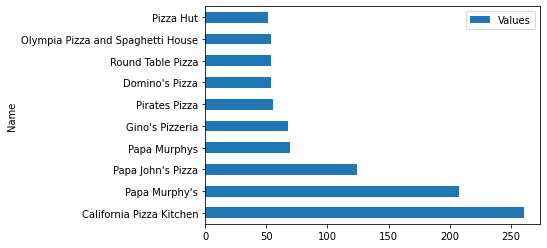

In [5]:
#Question 4:
'''

'''
print('total franchises in the data set: {}'.format(len(np.unique(pizzaria_df['id']))))
restaurant_list = pizzaria_df['name'].value_counts().reset_index().rename(columns ={'index':'Name','name':'number of branches'},\
                                                                          index={0:1,1:2,2:3,3:4,4:5,5:6,7:8,9:10})

pizzaria_df['name'].value_counts().head(10).reset_index().rename(columns ={'index':'Name','name':'Values'}).plot('Name','Values',kind ='barh')
                                                       
display(restaurant_list.head(10))
print('==='*40) 

,Name,menus.name
1,Cheese Pizza,298
2,White Pizza,225
3,Hawaiian Pizza,149
4,Buffalo Chicken Pizza,112
5,Margherita Pizza,104
6,Veggie Pizza,95
7,Bbq Chicken Pizza,81
8,Greek Pizza,72
9,Pizza Sub,71
10,Pizza Burger,70


<AxesSubplot:xlabel='Name'>

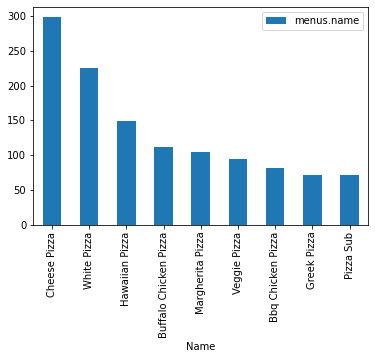

In [6]:
#Question 5:
'''
Top 10 Pizza flavors 
'''
#Removed the 'pizza' line as it is generalized 
menu_pizza_df = pizzaria_df['menus.name'].value_counts().reset_index()
menu_pizza_df = menu_pizza_df.drop(menu_pizza_df.index[[4]])
menu_pizza_df = menu_pizza_df.rename(columns ={'index':'Name'},index={0:1,1:2,2:3,3:4})

display(menu_pizza_df.head(10))
print('==='*40) 

#I plotted by stages to remove the 'pizza' line 
menu_pizza_grapic_df = pizzaria_df['menus.name'].value_counts().head(10).reset_index().rename(columns ={'index':'Name'})                                                      
menu_pizza_grapic_df = menu_pizza_grapic_df.drop(menu_pizza_grapic_df.index[[4]])
menu_pizza_grapic_df.plot('Name','menus.name',kind='bar')  



In [12]:
#Question 6:
'''
where can i find cheese pizza: 
'''
chesse_pizza_df =  pizzaria_df[pizzaria_df['menus.name'] == 'Cheese Pizza']
chesse_pizza_df.drop_duplicates('id',inplace = True)
chesse_pizza_df.shape
fig = go.Figure(data=go.Scattergeo(
        lon = chesse_pizza_df['longitude'],
        lat = chesse_pizza_df['latitude'],
        text = chesse_pizza_df['name'] + ' :-' + chesse_pizza_df['province'],
        mode = 'markers',
        
    
        marker_color = 'red',
        ))

fig.update_layout(
        title = 'Cheese Pizza',
        geo_scope='usa',
    )
fig.show()



In [35]:
#Question 7:
'''
where is the most expansive and cheap pizza 
'''
expansive_pizza_df = pizzaria_df[['city','name','menus.name','menus.amountMin','longitude','latitude']][pizzaria_df['menus.amountMin'] == pizzaria_df['menus.amountMin'].max()]\
                                                                         .rename(columns={'menus.amountMin':'maximum value'},\
                                                                                index={3270:1,3285:2,3287:3,4774:4,4775:5})
display(expansive_pizza_df)

print('==='*40)

cheap_pizza_df = pizzaria_df[['city','name','menus.name','menus.amountMax','longitude','latitude']][pizzaria_df['menus.amountMax'] == pizzaria_df['menus.amountMax'].min()]\
                                                                         .rename(columns={'menus.amountMax':'minimum value'},\
                                                                                index={804:1,2777:2,2778:3,7827:4})

display(cheap_pizza_df)


print('==='*40)
all_values_df = expansive_pizza_df.merge(cheap_pizza_df,how='outer').rename(columns={'menus.amountMax':'minimum value','menus.amountMin':'maximum value'},\
                                                                         index={0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9})
display(all_values_df)

print('==='*40)

fig = go.Figure(data=go.Scattergeo(
        lon = all_values_df['longitude'],
        lat = all_values_df['latitude'],
        text = all_values_df['name'],
        mode = 'markers',
        
    
        marker_color = 'red',
        ))

fig.update_layout(
        title = 'Cheese Pizza',
        geo_scope='usa',
    )
fig.show()



,city,name,menus.name,maximum value,longitude,latitude
1,Los Angeles,California Pizza Kitchen,Vegetarian Large Pizza Catering Package,243.0,-118.34040,34.102000
2,Los Angeles,California Pizza Kitchen,Adventurous Large Pizza Catering Package,243.0,-118.34040,34.102000
3,Los Angeles,California Pizza Kitchen,CPK Classics Large Pizza Catering Package,243.0,-118.34040,34.102000
4,Los Angeles,California Pizza Kitchen,Vegetarian Large Pizza Catering Package,243.0,-118.46511,34.054118
5,Los Angeles,California Pizza Kitchen,Adventurous Large Pizza Catering Package,243.0,-118.46511,34.054118


,city,name,menus.name,minimum value,longitude,latitude
1,West Chester,Fratellis Pizzeria,Pizza By the Slice,0.25,-84.395632,39.357537
2,Cadiz,DiAngelos,"6"" Pizza Sub",0.25,-80.996825,40.272624
3,Cadiz,DiAngelos,French Bread Pizza,0.25,-80.996825,40.272624
4,Seattle,Stacia's Gourmet Pizza and Pasta,Garlic Herb Pizza Crust,0.25,-122.361060,47.690630


,city,name,menus.name,maximum value,longitude,latitude,minimum value
1,Los Angeles,California Pizza Kitchen,Vegetarian Large Pizza Catering Package,243.0,-118.340400,34.102000,NaN
2,Los Angeles,California Pizza Kitchen,Adventurous Large Pizza Catering Package,243.0,-118.340400,34.102000,NaN
3,Los Angeles,California Pizza Kitchen,CPK Classics Large Pizza Catering Package,243.0,-118.340400,34.102000,NaN
4,Los Angeles,California Pizza Kitchen,Vegetarian Large Pizza Catering Package,243.0,-118.465110,34.054118,NaN
5,Los Angeles,California Pizza Kitchen,Adventurous Large Pizza Catering Package,243.0,-118.465110,34.054118,NaN
6,West Chester,Fratellis Pizzeria,Pizza By the Slice,NaN,-84.395632,39.357537,0.25
7,Cadiz,DiAngelos,"6"" Pizza Sub",NaN,-80.996825,40.272624,0.25
8,Cadiz,DiAngelos,French Bread Pizza,NaN,-80.996825,40.272624,0.25
9,Seattle,Stacia's Gourmet Pizza and Pasta,Garlic Herb Pizza Crust,NaN,-122.361060,47.690630,0.25
